<a href="https://colab.research.google.com/github/hyuntaedo/Data_Analysis/blob/main/%EA%B5%AD%EA%B0%80%EB%B3%84%EC%9D%8C%EC%A3%BC%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#국가별 음주 데이터 분석

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file_name = '/content/drive/MyDrive/Data_Folder/data/drinks.csv'
drinks = pd.read_csv(file_name)

In [ ]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


*   단순 상관 분석 : 1:1

    두 변수간의 선형적 관계를 상관 계수로 표현

*   다중 상관 분석 : 다:다

In [ ]:
# 피처간의 상관계수 행렬을 구함
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


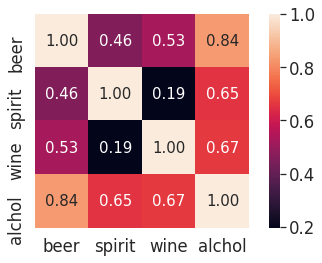

In [ ]:
import seaborn as sns

cols_view = ['beer','spirit','wine','alchol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols_view,
                 xticklabels=cols_view)
plt.tight_layout()
plt.show()

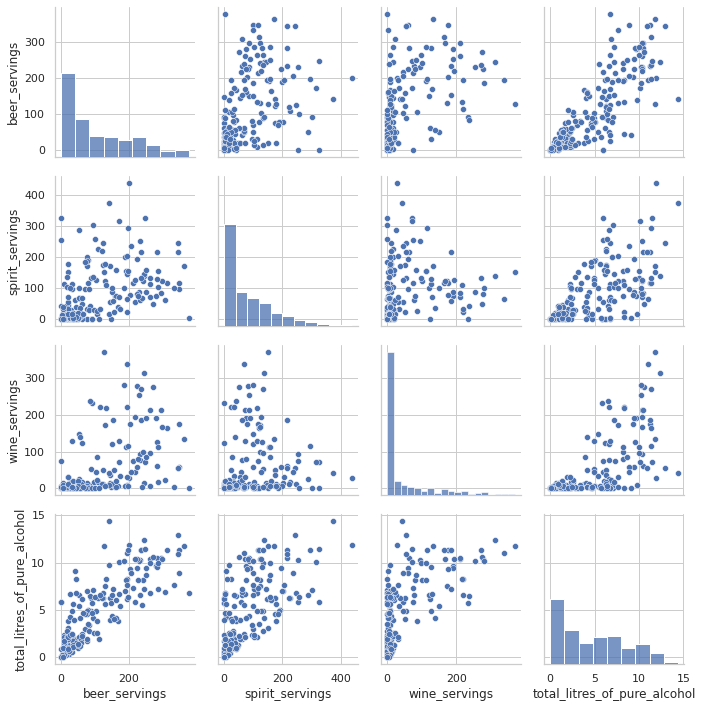

In [ ]:
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']],height=2.5)
plt.show()

In [ ]:
#결측 데이터 처리
drinks['continent'] = drinks['continent'].fillna('OT')

In [ ]:
drinks['continent'].isnull().sum()

0

In [ ]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

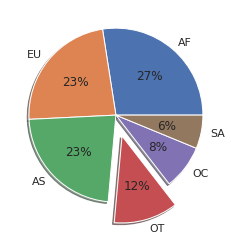

In [ ]:
label = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)
plt.pie(fracs1,explode=explode,labels=label,autopct='%0.f%%',shadow=True)
plt.show()

In [ ]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
#전체 평균보다 많은 alchol을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')["total_litres_of_pure_alcohol"].mean()
continent_over_mean = continent_mean[continent_mean>=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
total_mean

4.717098445595855

In [ ]:
#평균 beer_servings이 가장 높은 대륙
#idxmax는 가장 값이 큰 index
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


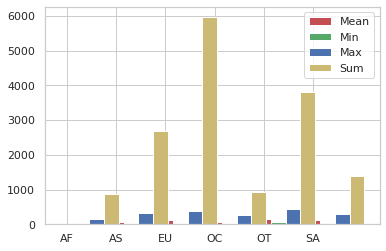

In [ ]:
n_groupe = len(result.index)
means = result['mean'].tolist()
min = result['min'].tolist()
max = result['max'].tolist()
sum = result['sum'].tolist()

index = np.arange(n_groupe)
bar_width =0.3

rect1 = plt.bar(index,means,bar_width,color='r',label="Mean")
rect2 = plt.bar(index + bar_width, min, bar_width, color='g', label="Min")
rect3 = plt.bar(index + bar_width * 2, max, bar_width, color='b', label="Max")
rect4 = plt.bar(index + bar_width * 3 , sum, bar_width, color='y',label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()

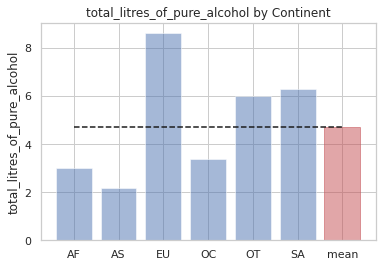

In [ ]:
continent = continent_mean.index.tolist()
continent.append('mean')
x_pos = np.arange(len(continent))
alchol = continent_mean.tolist()
alchol.append(total_mean)

bar_list = plt.bar(x_pos,alchol,align="center",alpha=0.5)
bar_list[len(continent)-1].set_color('r')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos,continent)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

##<strong>아프리카와 유럽간의 맥주 소비량 차이 검정</strong>

In [ ]:
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']
from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'],equal_var=False)

print('The t-statistic and p_value assuming equal variances is %.3f and %.3f'% tTestResult)
print('The t-statistic and p_value not assuming equal variances is %.3f and %.3f'% tTestResultDiffVar)

The t-statistic and p_value assuming equal variances is -7.268 and 0.000
The t-statistic and p_value not assuming equal variances is -7.144 and 0.000


##<strong>대한민국은 얼마나 술을 독하게 마시는 나라인가?</strong>